In [1]:
#Importing required libraies for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

### 1.Data Sourcing

In [2]:
#Loading data into dataframe(df)
df = pd.read_csv('/content/loan.csv')

#Printing fisrt 5rows in df
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2            1-Nov               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [3]:
#Checking the runmber of columns and rows
df.shape

(39717, 111)

### 2.Data cleaning

##### 2.1 Finding column with NULL value percentage

Taking number of null values in each column and dividing with length of dataframe(no. of rows), if full column have null value then (df.isnull().sum()/len(df)) will return 1.<br>Multiplying with 100 for percentage.<br>if full column value is null we will get 100

In [4]:
#Finding the NULL value percentage in columns
columns_nullvalue=(df.isnull().sum()/len(df))*100

#Displays the columns with percentage of NULL values
print(columns_nullvalue)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

###### 2.2 Dropping column which is having more than 50% of its data as NULL

In [5]:
#Dropping columns which is having more than 50% of it data with NULL values
df = df.drop(columns= columns_nullvalue[columns_nullvalue>50].index , axis=1)

#checking whether column number get reduced or not
df.shape

(39717, 54)

After dropping columns with more than 50% of its values are NULL.<br>The total column reduced to 54 from 111

##### 2.3 Filtering the Unwanted columns.

In [6]:
#checking for possible columns to be removed 
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2            1-Nov               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0          9                   f       0.00           0.00   5863.155187   
1          4                   f       0.00           0.00   1008.710000   
2         10                   f       0.00           0.00   3005.666844   
3         37                   f       0.00           0.00  12231.890000   
4         38                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   

In [7]:
#Initializiong empty list for gathering unwanted columns name
unwanted_column = []

##### List of unwanted columns

The following columns are marking as unwanted columns as its not having any role in analysis.
<br>1)URL
<br>2)zip_code
<br>3)earliest_cr_line
<br>4)out_prncp
<br>5)out_prncp_inv
<br>6)pymnt_plan
<br>7)application_type
<br>8)policy_code
<br>9)collections_12_mths_ex_med
<br>10)acc_now_delinq
<br>11)chargeoff_within_12_mths
<br>12)tax_liens
<br>13)delinq_amnt
<br>14)id
<br>15)desc


In [8]:
#Adding columns names to a list
unwanted_column = ['id','desc','url','zip_code','earliest_cr_line','out_prncp','out_prncp_inv','pymnt_plan','application_type','policy_code','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','tax_liens','delinq_amnt']

In [9]:
#dropping unwanted columns from main df
df.drop(unwanted_column, inplace=True, axis=1)

#checking whether the column number reduced or not
df.shape

(39717, 39)

As can withness, the number of columns reduced from 54 to 39

##### 2.4 Filtering Unwanted rows

Removing the rows which is having 'Current' as its loan status. 
<br>1)Since, the prediction need to find a default loan applicant, the 'Fully paid' and 'Charged' data will play a 100% role in prediction of defaulter. 
<br>2)The 'Current' will have a 50-50 chance for to end up in fully paid and charged.

In [10]:
#Using drop to delete Rows with certain column values
df.drop(df[df['loan_status'] == 'Current'].index, inplace = True)
#checking whether no. of rows get reduced or not
print(df.shape)
print(df.loan_status.unique())
print(list(df.loan_status.value_counts()))

(38577, 39)
['Fully Paid' 'Charged Off']
[32950, 5627]


##### 2.5 Filling missing values

In [11]:
#Cheching list of columns which is having NULL values
df.columns[df.isnull().any()]
print('Number of NULL values with column name')
for i in df.columns[df.isnull().any()]:
    print(i,':',df[i].isnull().sum())

Number of NULL values with column name
emp_title : 2386
emp_length : 1033
title : 11
revol_util : 50
last_pymnt_d : 71
last_credit_pull_d : 2
pub_rec_bankruptcies : 697


##### 2.5.1 Filling emp_length NULL value with 0


In [12]:
#checking the unique value present in emp_length column
print(df.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


Employee length provide a number of years employee having work experiance. Since, NULL values are present for 1033 rows, either we can fill with minimum value or zero.
<br>Minimum value can'nt be used, since less than 1year itself will have internal range from 1-Month to 11-Month. so, using minimum value will affect an analysis.
<br>We choose to fill with zero, considering them as unemployed for to see the impact of emp_length on default.

In [13]:
#Replacing the NULL value with Zero
df['emp_length'] = df['emp_length'].replace(np.nan, 0)

#Displaying the emp_length unique value after filling NULL with zero
print(df.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' 0]


The output list have 0, instead of nan. so, we replaced NULL value with zero

##### 2.5.1 Filling title column NULL values. since, it has only 11 rows as NULL.

Column Title is an categorical variable. So filling missing values with its MODE

In [14]:
#Displying the MODE value
print('Filling Missing value with its MODE:',df['title'].mode()[0])  

#Replacing with MODE values
df['title'] = df['title'].fillna(df['title'].mode()[0])

#Checking whether NULL value in TITLE column as been replaced by mode or not
print('Presence of NULL values: ',df['title'].isnull().sum())

Filling Missing value with its MODE: Debt Consolidation
Presence of NULL values:  0


As we received 0 as output, no NULL values present in column title

Leaving following NULL values in column as it is, since there be no major impact.
<br>emp_title : 2386
<br>desc : 12527
<br>revol_util : 50
<br>last_pymnt_d : 71
<br>last_credit_pull_d : 2
<br>pub_rec_bankruptcies : 697

In [15]:
df.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0    1296599       5000         5000           4975.0   36 months   10.65%   
1    1314167       2500         2500           2500.0   60 months   15.27%   
2    1313524       2400         2400           2400.0   36 months   15.96%   
3    1277178      10000        10000          10000.0   36 months   13.49%   
5    1311441       5000         5000           5000.0   36 months    7.90%   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN  10+ years   
1        59.83     C        C4                 Ryder   < 1 year   
2        84.33     C        C5                   NaN  10+ years   
3       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
5           RENT     36000.0     Source Verified  11-Dec   Fully Paid   

          purpose                                  title addr_state    dti  \
0     credit_card                               Computer         AZ  27.65   
1             car                                   bike         GA   1.00   
2  small_business                   real estate business         IL   8.72   
3           other                               personel         CA  20.00   
5         wedding  My wedding loan I promise to pay back         AZ  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
5            0               3         9        0       7963     28.30%   

   total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0          9                   f   5863.155187          5833.84   
1          4                   f   1008.710000          1008.71   
2         10                   f   3005.666844          3005.67   
3         37                   f  12231.890000         12231.89   
5         12                   f   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       15-Jan           171.62             16-May   
1                     1.11       13-Apr           119.66             13-Sep   
2                     0.00       14-Jun           649.91             16-May   
3                     0.00       15-Jan           357.48             16-Apr   
5                     0.00       15-Jan           161.03             16-Jan   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

In [16]:
#Removing the Symbol % in int_rate column, for to make it datatype as Int32, interest rate is a numberical valriable which need to be in integer datatype
df['int_rate'] = df['int_rate'].map(lambda x: x.split('%')[0])
df.int_rate = df.int_rate.astype("float64")


###### 2.6 Treating Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


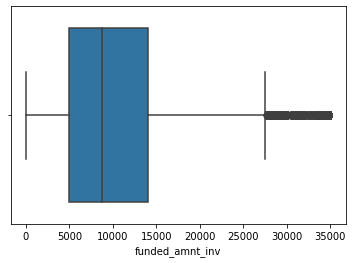

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


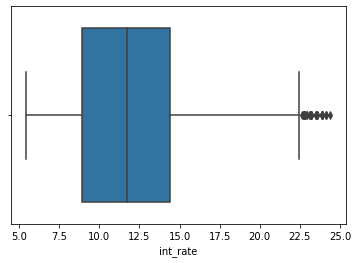

In [17]:
#checking for possible outliers
sns.boxplot(df['funded_amnt_inv'])
plt.show()

sns.boxplot(df['int_rate'])
plt.show()



There are two Extreme outlier present in annual income column. So removing both the extreme Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


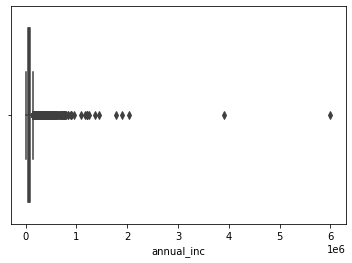

In [18]:
sns.boxplot(df['annual_inc'])
plt.show()


From this,it can be concluded that annual income has lot of outliers in upper fence

**Recommendation : So in order to treat them, we can remove the records after third quartile**

In [19]:
print(df.int_rate.unique())
print(list(df.int_rate.value_counts()))

[10.65 15.27 15.96 13.49  7.9  18.64 21.28 12.69 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 20.89 20.3  23.91 19.03 23.13 22.74 22.35 22.06 24.11  6.   23.52
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 19.29 13.99 18.39 16.89 17.99
 20.99 22.85 19.69 20.62 20.25 21.36 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.4  21.48 14.82 14.17
  7.29 17.88 20.11 16.02 13.43 14.91 13.06 15.28 15.65 17.14 11.11 10.37
 16.4  17.51  7.66 18.62 10.74  5.79  6.92 10.    9.63 14.54 12.68 19.36
 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36  6.17
  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72 14.09
 14.46 20.03 17.8  15.2  15.57 18.54 19.66 17.06 18.17 17.43 20.4  20.77
 18.91 21.14 17.44 13.23  7.88 11.12 13.61 10.38 17

In [20]:
df.int_rate.dtype

dtype('float64')

In [21]:
df['term'] = df['term'].map(lambda x: x.split(' ')[1])
#df['int_rate'] = df['int_rate'].map(lambda x: x.split('%')[0])

In [22]:
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  \
0    1296599       5000         5000           4975.0   36     10.65   
1    1314167       2500         2500           2500.0   60     15.27   
2    1313524       2400         2400           2400.0   36     15.96   
3    1277178      10000        10000          10000.0   36     13.49   
5    1311441       5000         5000           5000.0   36      7.90   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN  10+ years   
1        59.83     C        C4                 Ryder   < 1 year   
2        84.33     C        C5                   NaN  10+ years   
3       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
5           RENT     36000.0     Source Verified  11-Dec   Fully Paid   

          purpose                                  title addr_state    dti  \
0     credit_card                               Computer         AZ  27.65   
1             car                                   bike         GA   1.00   
2  small_business                   real estate business         IL   8.72   
3           other                               personel         CA  20.00   
5         wedding  My wedding loan I promise to pay back         AZ  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
5            0               3         9        0       7963     28.30%   

   total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0          9                   f   5863.155187          5833.84   
1          4                   f   1008.710000          1008.71   
2         10                   f   3005.666844          3005.67   
3         37                   f  12231.890000         12231.89   
5         12                   f   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       15-Jan           171.62             16-May   
1                     1.11       13-Apr           119.66             13-Sep   
2                     0.00       14-Jun           649.91             16-May   
3                     0.00       15-Jan           357.48             16-Apr   
5                     0.00       15-Jan           161.03             16-Jan   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

In [23]:
df.term.dtype

dtype('O')

In [24]:
#Converting the default datatype to accurate types as per data

df.term = df.term.astype("int32")


df.int_rate = df.int_rate.astype("float64")

In [25]:
print(df.home_ownership.unique())
print(list(df.home_ownership.value_counts()))


['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
[18480, 17021, 2975, 98, 3]


In [26]:
df['homeownership_Numericstatus'] = df['home_ownership']
a=1
dict1 = {}
for i in df.home_ownership.unique():
    df['homeownership_Numericstatus'] = df['homeownership_Numericstatus'].map(lambda x: a if x==i else x)
    dict1[a] = i
    a=a+1

In [27]:
#df['homeownership_Numericstatus'].info
print(dict1)

{1: 'RENT', 2: 'OWN', 3: 'MORTGAGE', 4: 'OTHER', 5: 'NONE'}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


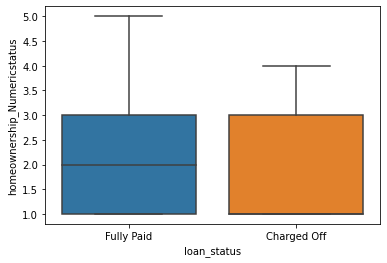

In [28]:
sns.boxplot(df['loan_status'],df['homeownership_Numericstatus'])
plt.show()

In [29]:
print(df.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' 0]


In [30]:
df['emp_length'] = df['emp_length'].replace(np.nan, 0)

In [31]:
df['empworkyear'] = df['emp_length']
for i in df.emp_length.unique():
   if i != 0:
       a = i.split(' ')[0]
       if i != '< 1 year':
           df['empworkyear'] = df['empworkyear'].map(lambda x: a if x==i else x)
        

In [32]:
print(df['emp_length'].isnull().sum())

0


In [33]:
print(df['empworkyear'])
print(df.empworkyear.unique())
print(list(df.empworkyear.value_counts()))

0             10+
1        < 1 year
2             10+
3             10+
5               3
6               8
7               9
8               4
9        < 1 year
10              5
11            10+
12       < 1 year
13              3
14              3
15       < 1 year
16              4
17            10+
18              1
19              6
20              3
21            10+
22            10+
23              5
24              1
25              2
26              9
27              2
28            10+
29       < 1 year
30              7
31              5
33              2
34              7
35            10+
36              2
37              1
38              1
40              4
41            10+
42              9
43            10+
44            10+
45              6
46            10+
47              6
48            10+
49              5
50              8
51              9
52       < 1 year
53              4
54              1
55              7
56              7
57       < 1 year
58        

In [34]:
df['empworkyear'] = df['empworkyear'].replace('10+', 10)
df['empworkyear'] = df['empworkyear'].replace('< 1 year', 1 )

In [35]:
df.empworkyear = df.empworkyear.astype("int32")
#df.empworkyear = df.empworkyear.astype("float64")

In [36]:
print(df.empworkyear.unique())
print(list(df.empworkyear.value_counts()))

[10  1  3  8  9  4  5  6  2  7  0]
[8488, 7677, 4291, 4012, 3342, 3194, 2168, 1711, 1435, 1226, 1033]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


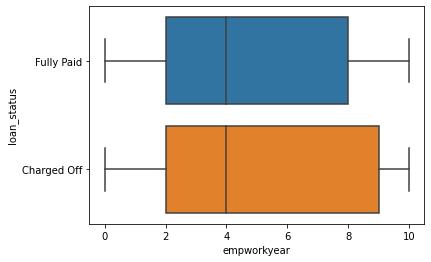

In [37]:
sns.boxplot(df['empworkyear'],df['loan_status'])
plt.show()

In [38]:
print(df.grade.unique())
print(list(df.grade.value_counts()))

['B' 'C' 'A' 'E' 'F' 'D' 'G']
[11675, 10045, 7834, 5085, 2663, 976, 299]


In [39]:
df['gradenumericvalue'] = df['grade']
a=1
dict2 = {}
for i in sorted(df.gradenumericvalue.unique()):
    df['gradenumericvalue'] = df['gradenumericvalue'].map(lambda x: a if x==i else x)
    dict2[a] = i
    a=a+1
print(dict2)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


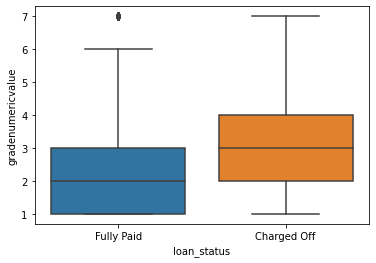

In [40]:
sns.boxplot(df['loan_status'],df['gradenumericvalue'])
plt.show()

Conclusion: Charged off category has median grade as 'C'. whereas Fullypaid category has median grade 'B'




In [41]:
df['int_rate'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


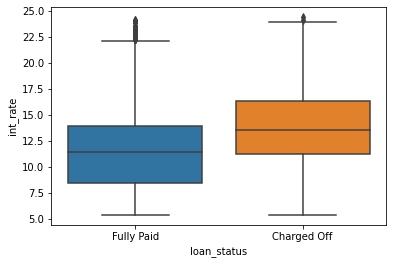

In [42]:
sns.boxplot(df['loan_status'],df['int_rate'])
plt.show()

Conclusion: Charged off applicants have highest interest rate than Fully paid applicants

In [43]:
print(df['annual_inc'].describe())
iqr3 = df['annual_inc'].quantile(0.99)
print('At 99% value : ',iqr3)

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
At 99% value :  234143.99999999878


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


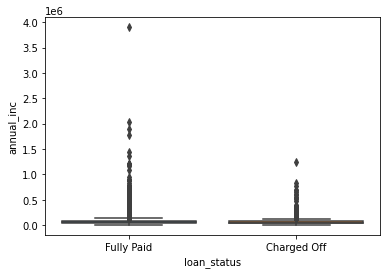

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


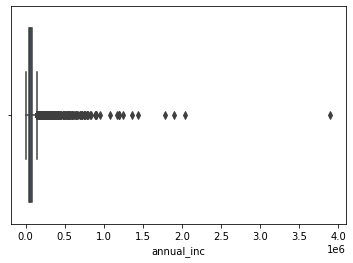

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


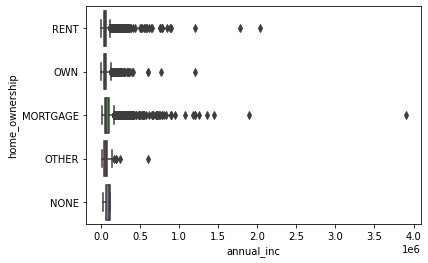

In [44]:
df = df[(df['annual_inc']<df['annual_inc'].max())]
#plt.figure(figsize=[50,12])
sns.boxplot(df['loan_status'],df['annual_inc'])
plt.show()


sns.boxplot(df['annual_inc'])
plt.show()

sns.boxplot(df['annual_inc'],df['home_ownership'])
plt.show()

In [45]:
#Changing loan status to categorical numeric values
df['loanstatusnumvalue'] = df['loan_status']
a=1
dict3 = {}
for i in df.loan_status.unique():
    df['loanstatusnumvalue'] = df['loanstatusnumvalue'].map(lambda x: a if x==i else x)
    dict3[a] = i
    a=a+1

In [46]:
df['loanstatusnumvalue']

0        1
1        2
2        1
3        1
5        1
6        1
7        1
8        2
9        2
10       1
11       1
12       2
13       1
14       2
15       1
16       1
17       1
18       1
19       1
20       1
21       2
22       1
23       1
24       2
25       1
26       2
27       2
28       1
29       1
30       1
31       1
33       1
34       1
35       1
36       1
37       1
38       1
40       1
41       1
42       1
43       1
44       1
45       1
46       2
47       1
48       1
49       1
50       2
51       1
52       1
53       2
54       1
55       2
56       1
57       1
58       1
59       1
60       1
61       1
62       1
63       1
64       2
65       1
66       2
67       1
68       2
69       1
70       1
71       2
72       1
73       1
74       1
75       1
76       1
77       1
78       1
79       1
80       1
81       1
82       1
83       1
84       1
85       1
87       1
88       1
89       1
90       1
91       1
92       1
93       1
94       1

In [47]:
df.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599       5000         5000           4975.0    36     10.65   
1    1314167       2500         2500           2500.0    60     15.27   
2    1313524       2400         2400           2400.0    36     15.96   
3    1277178      10000        10000          10000.0    36     13.49   
5    1311441       5000         5000           5000.0    36      7.90   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN  10+ years   
1        59.83     C        C4                 Ryder   < 1 year   
2        84.33     C        C5                   NaN  10+ years   
3       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
5           RENT     36000.0     Source Verified  11-Dec   Fully Paid   

          purpose                                  title addr_state    dti  \
0     credit_card                               Computer         AZ  27.65   
1             car                                   bike         GA   1.00   
2  small_business                   real estate business         IL   8.72   
3           other                               personel         CA  20.00   
5         wedding  My wedding loan I promise to pay back         AZ  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
5            0               3         9        0       7963     28.30%   

   total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0          9                   f   5863.155187          5833.84   
1          4                   f   1008.710000          1008.71   
2         10                   f   3005.666844          3005.67   
3         37                   f  12231.890000         12231.89   
5         12                   f   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       15-Jan           171.62             16-May   
1                     1.11       13-Apr           119.66             13-Sep   
2                     0.00       14-Jun           649.91             16-May   
3                     0.00       15-Jan           357.48             16-Apr   
5                     0.00       15-Jan           161.03             16-Jan   

   pub_rec_bankruptcies  homeownership_Numericstatus  empworkyear  \
0                   0.0                            1           10   
1                   0.0                            1            1   
2                   0.0                            1           10   
3                   0.0                            1           10   
5                   0.0                            1            3   

   gradenumericvalue  loanstatusnumvalue  
0                  2                   1  
1       

#**Univariate Analysis**


Univariate Analysis on Categorical Variables

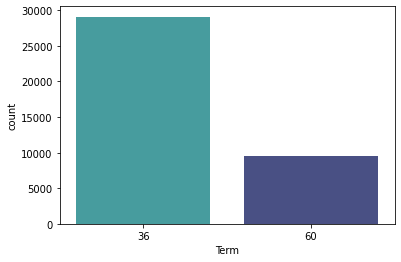

In [48]:
sns.countplot(x='term', data=df, palette="mako_r")
plt.xlabel("Term")
plt.show()

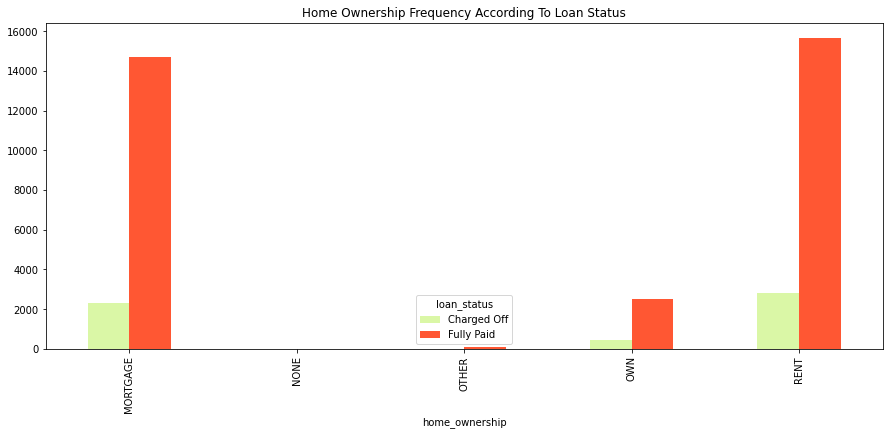

In [49]:
pd.crosstab(df.home_ownership,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Home Ownership Frequency According To Loan Status')
plt.show()

*COnclusion :RENT and MORTGAGE home ownership are likely to have high Charge Off.*

In [50]:
df.loan_status.value_counts()

Fully Paid     32949
Charged Off     5627
Name: loan_status, dtype: int64

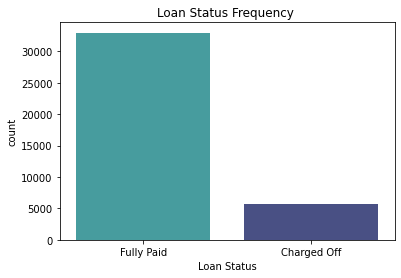

In [51]:
sns.countplot(x='loan_status', data=df, palette="mako_r")
plt.title('Loan Status Frequency ')
plt.xlabel("Loan Status")
plt.show()

*5627 applicants are charged off*

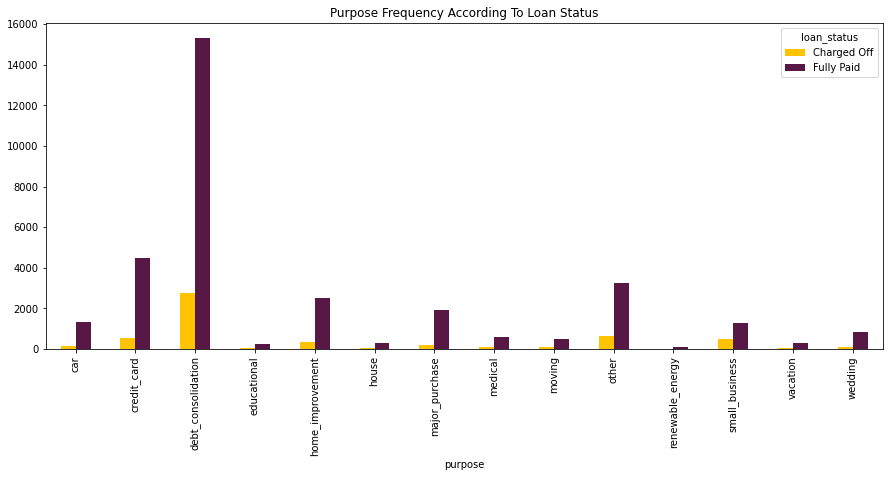

In [52]:
pd.crosstab(df.purpose,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Purpose Frequency According To Loan Status')
plt.show()

Conclusion :Applicants who took loan for 'Debt Consolidation' are likely to have high Charge off rate

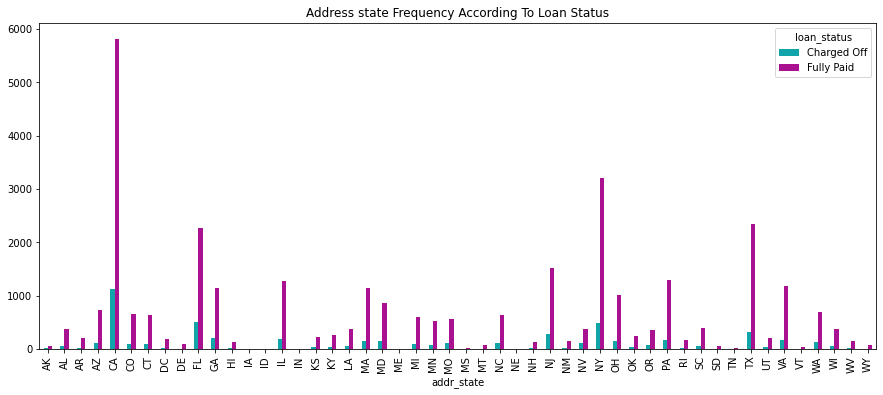

In [53]:
pd.crosstab(df.addr_state,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Address state Frequency According To Loan Status')
plt.show()

Conclusion: Canada has highest rate of charge off followed by Newyork and Florida

36    29095
60     9481
Name: term, dtype: int64


loan_status  term
Charged Off  36       3227
             60       2400
Fully Paid   36      25868
             60       7081
Name: term, dtype: int64




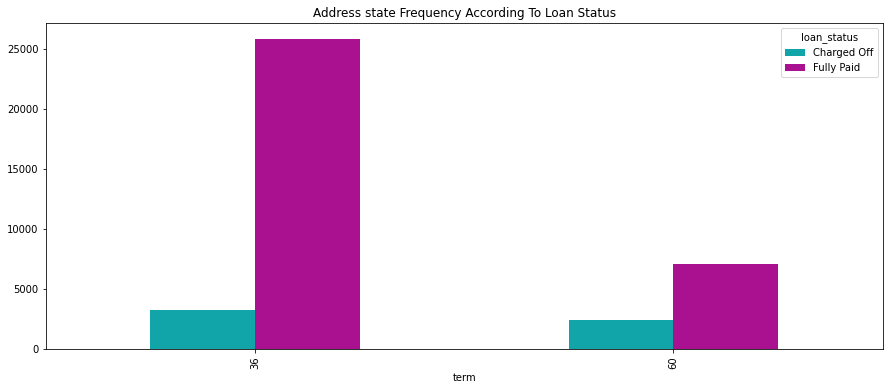

In [54]:
series = df.term.value_counts(dropna = False)

print(series.sort_index())
print('\n')
print(df.groupby(by = 'loan_status').term.value_counts(dropna = False).sort_index())
print('\n')


pd.crosstab(df.term,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Address state Frequency According To Loan Status')
plt.show()

Conclusion: most of the Charged off applicants apply for 36 months Loan Term

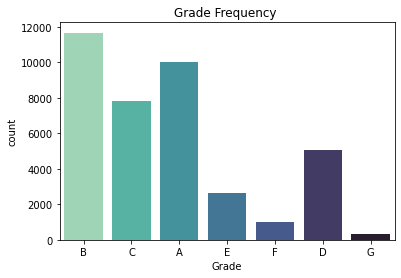

In [55]:
sns.countplot(x='grade', data=df, palette="mako_r")
plt.title('Grade Frequency ')
plt.xlabel("Grade")
plt.show()

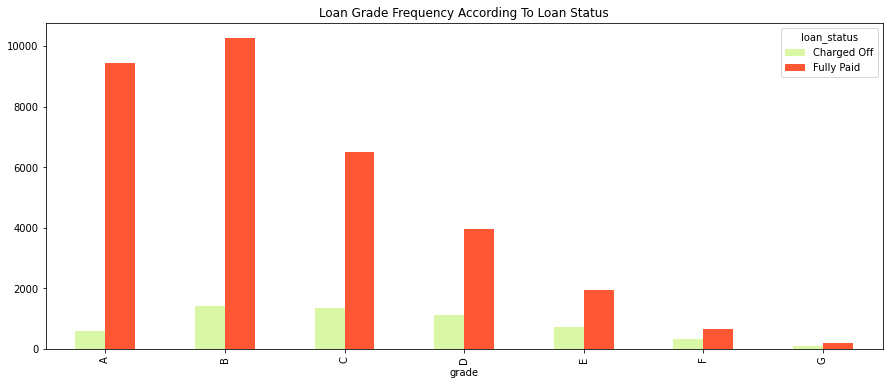

In [56]:
pd.crosstab(df.grade,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Loan Grade Frequency According To Loan Status')
plt.show()

Conclusion: most of the Charged off applicants belong to Grade B, C and D.

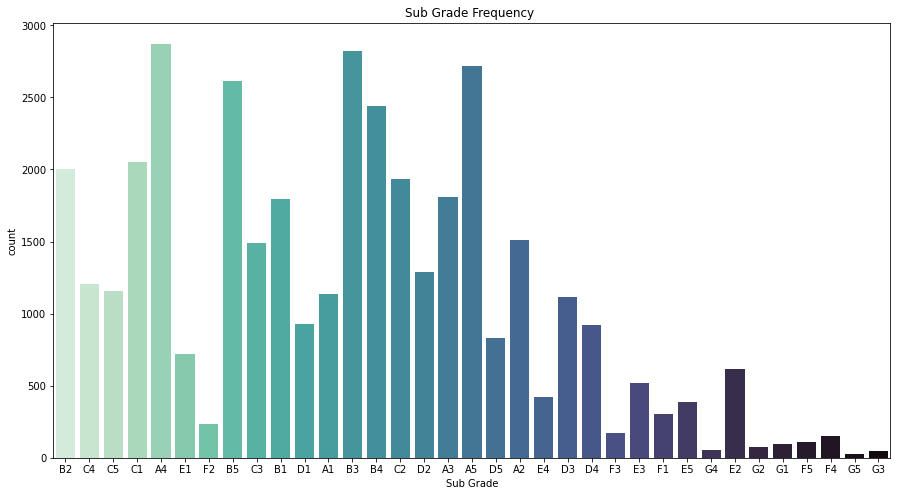

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(x='sub_grade', data=df, palette="mako_r")

plt.title('Sub Grade Frequency ')
plt.xlabel("Sub Grade")
plt.show()

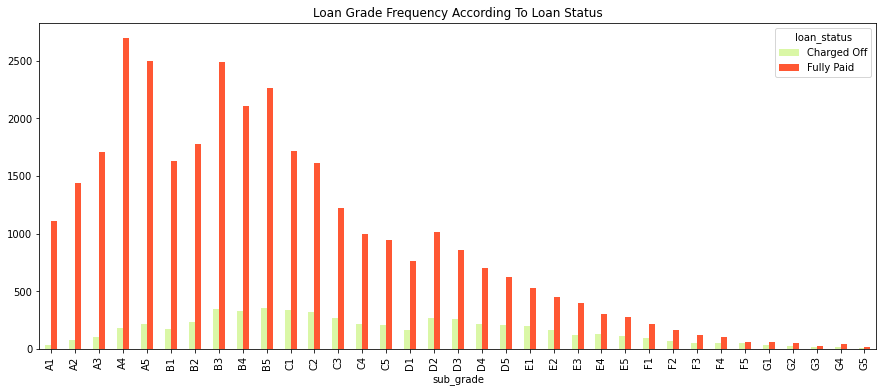

In [58]:
pd.crosstab(df.sub_grade,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Loan Grade Frequency According To Loan Status')
plt.show()

Conclusion: 

in B grade, B3, B4 , B5 are highly charged off

in C grade, C1,C2,C3 are highly charged off

in D grade, D2, D3,D4 are highly charged off

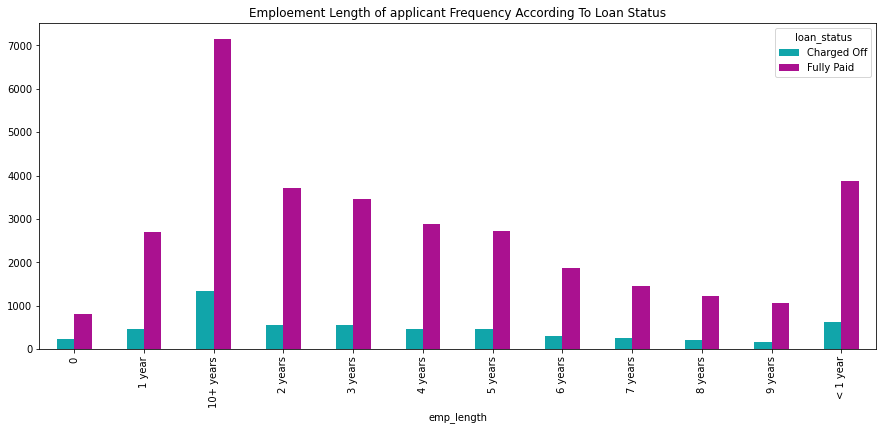

In [59]:
pd.crosstab(df.emp_length,df.loan_status).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Emploement Length of applicant Frequency According To Loan Status')
plt.show()

COnclusion: Applicant with 10+ years of employment has highest charged off rate followed by >1 year

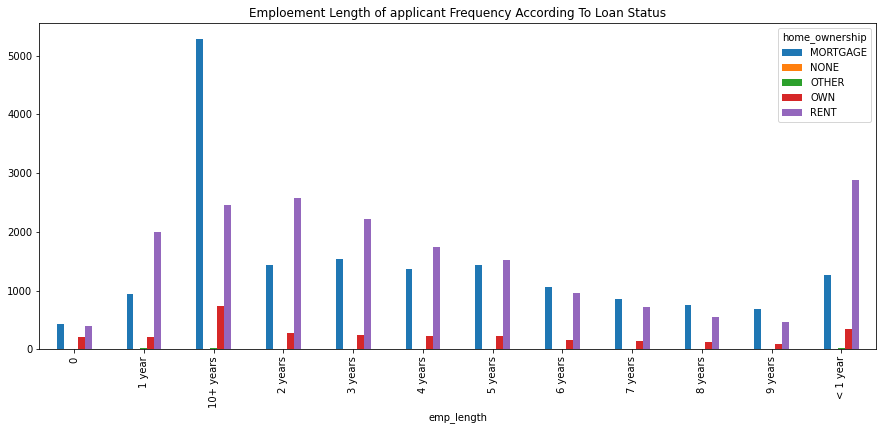

In [60]:
pd.crosstab(df.emp_length,df.home_ownership).plot(kind="bar",figsize=(15,6))
plt.title('Emploement Length of applicant Frequency According To Loan Status')
plt.show()

Applicants with 10+ years of employment experience are likely to have a own house compared to other categories

Univariate Analysis on Numerical Variables

In [61]:
from matplotlib import pyplot

count    38576.000000
mean     10784.208446
std       7090.336768
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


               count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5627.0  11753.398792  7760.516335  900.0  5575.0  10000.0   
Fully Paid   32949.0  10618.691007  6956.084578  500.0  5050.0   9200.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   14500.0  35000.0  




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


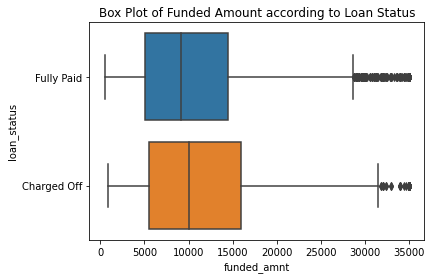

Text(0.5, 1.0, 'Violin Plot of Funded Amount according to Loan Status')

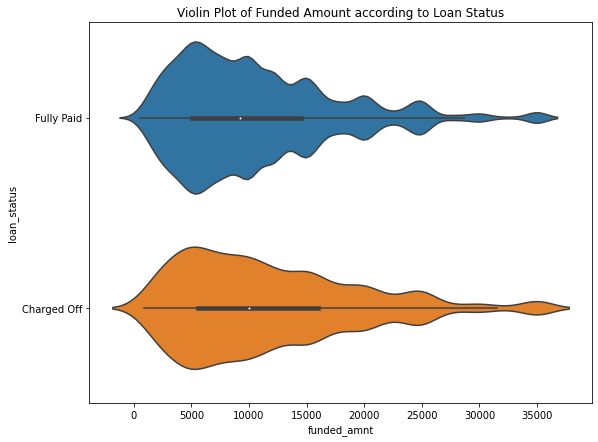

In [62]:
print(df.funded_amnt.describe())
print('\n')
print(df.groupby(by = 'loan_status').funded_amnt.describe().sort_index())
print('\n')
sns.boxplot(df['funded_amnt'],df['loan_status'])
plt.title('Box Plot of Funded Amount according to Loan Status')
plt.show()

fig, ax = pyplot.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = df["funded_amnt"], 
                  y = df["loan_status"] )
plt.title('Violin Plot of Funded Amount according to Loan Status')

Conclusion: Charged off has median(central tendency) of 10000 funded amount

count    38576.000000
mean        11.932198
std          3.691373
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5627.0  13.820432  3.654413  5.42  11.31  13.61  16.40  24.40
Fully Paid   32949.0  11.609727  3.600014  5.42   8.49  11.49  13.99  24.11




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


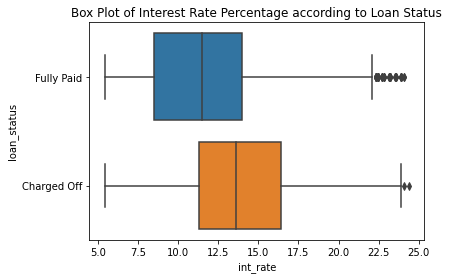

Text(0.5, 1.0, 'Violin Plot of Interest Rate Percentage according to Loan Status')

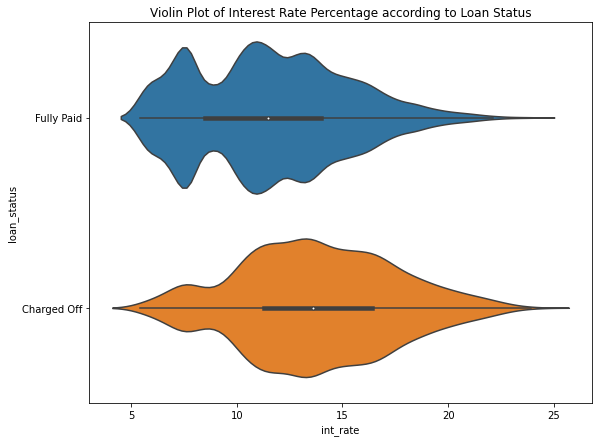

In [63]:
print(df['int_rate'].describe())
print('\n')
print(df.groupby(by = 'loan_status').int_rate.describe().sort_index())
print('\n')
sns.boxplot(df['int_rate'],df['loan_status'])
plt.title('Box Plot of Interest Rate Percentage according to Loan Status')
plt.show()

fig, ax = pyplot.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = df["int_rate"], 
                  y = df["loan_status"] )
plt.title('Violin Plot of Interest Rate Percentage according to Loan Status')

Conclusion: Distribution is not normal. 

Charged off has median of 13.61% of Interest Rate

count    38576.000000
mean       322.470326
std        208.640433
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


               count        mean         std    min      25%     50%     75%  \
loan_status                                                                    
Charged Off   5627.0  336.175006  217.051841  22.79  168.555  293.87  457.84   
Fully Paid   32949.0  320.129854  207.082553  15.69  165.270  275.66  420.74   

                 max  
loan_status           
Charged Off  1305.19  
Fully Paid   1295.21  




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


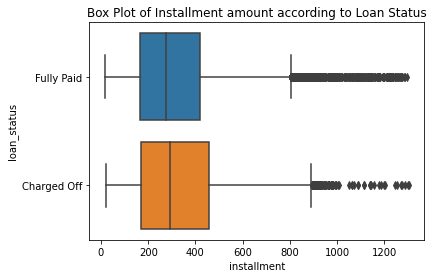

Text(0.5, 1.0, 'Violin Plot of Installment amount according to Loan Status')

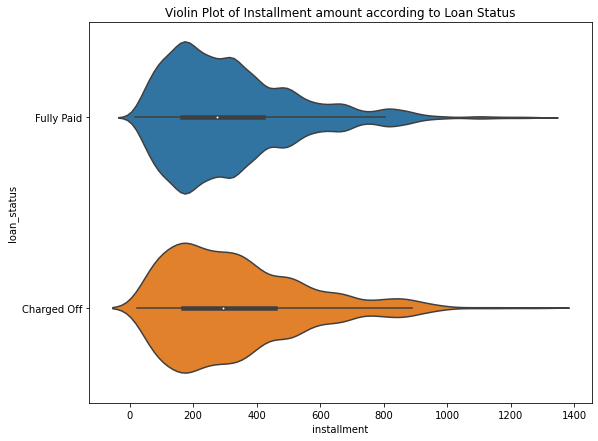

In [64]:
print(df['installment'].describe())
print('\n')
print(df.groupby(by = 'loan_status').installment.describe().sort_index())
print('\n')
sns.boxplot(df['installment'],df['loan_status'])
plt.title('Box Plot of Installment amount according to Loan Status')
plt.show()

fig, ax = pyplot.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = df["installment"], 
                  y = df["loan_status"] )
plt.title('Violin Plot of Installment amount according to Loan Status')

Conclusion : Charged off has median of 293.87 Installment amount

count    3.857600e+04
mean     6.862422e+04
std      5.667582e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886028e+04
75%      8.200000e+04
max      3.900000e+06
Name: annual_inc, dtype: float64


               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5627.0  62427.298034  47776.014188  4080.0  37000.0  53000.0   
Fully Paid   32949.0  69682.524042  57993.968932  4000.0  41124.0  60000.0   

                 75%        max  
loan_status                      
Charged Off  75000.0  1250000.0  
Fully Paid   84000.0  3900000.0  




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


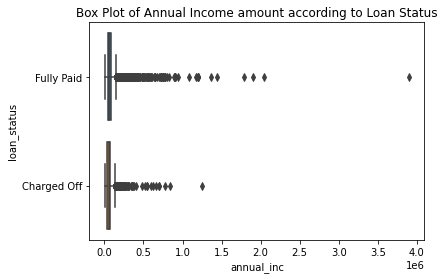

Text(0.5, 1.0, 'Violin Plot of Annual Income amount according to Loan Status')

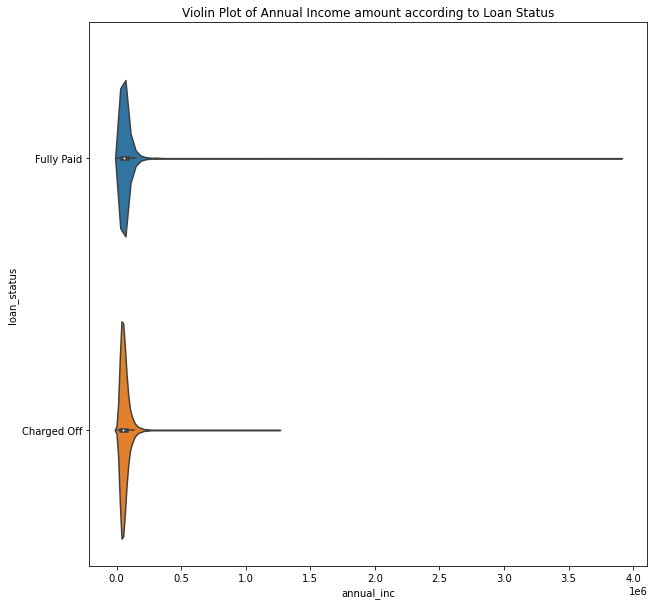

In [65]:
print(df['annual_inc'].describe())
print('\n')
print(df.groupby(by = 'loan_status').annual_inc.describe().sort_index())
print('\n')
sns.boxplot(df['annual_inc'],df['loan_status'])
plt.title('Box Plot of Annual Income amount according to Loan Status')
plt.show()

fig, ax = pyplot.subplots(figsize =(10, 10))
sns.violinplot(ax = ax, x = df["annual_inc"], 
                  y = df["loan_status"] )
plt.title('Violin Plot of Annual Income amount according to Loan Status')

Conclusion : Charged off has median of 4080 Annual Income amount

count    38576.000000
mean        13.273071
std          6.672789
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


               count       mean       std  min   25%    50%    75%    max
loan_status                                                              
Charged Off   5627.0  14.000624  6.585577  0.0  9.05  14.29  19.29  29.85
Fully Paid   32949.0  13.148820  6.679750  0.0  7.98  13.20  18.39  29.99




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


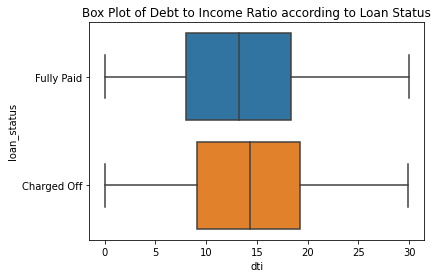

Text(0.5, 1.0, 'Violin Plot of Debt to Income Ratio according to Loan Status')

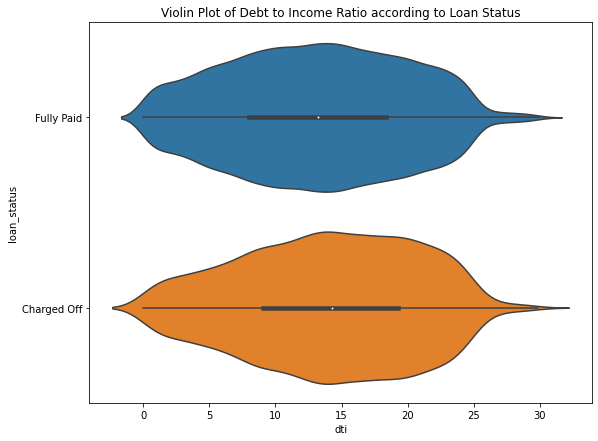

In [66]:
print(df['dti'].describe())
print('\n')
print(df.groupby(by = 'loan_status').dti.describe().sort_index())
print('\n')
sns.boxplot(df['dti'],df['loan_status'])
plt.title('Box Plot of Debt to Income Ratio according to Loan Status')
plt.show()

fig, ax = pyplot.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = df["dti"], 
                  y = df["loan_status"] )
plt.title('Violin Plot of Debt to Income Ratio according to Loan Status')

Conclusion : Distribution is not Normal

 Charged off has median of 14.29 DTI ratio

In [67]:
df.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599       5000         5000           4975.0    36     10.65   
1    1314167       2500         2500           2500.0    60     15.27   
2    1313524       2400         2400           2400.0    36     15.96   
3    1277178      10000        10000          10000.0    36     13.49   
5    1311441       5000         5000           5000.0    36      7.90   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN  10+ years   
1        59.83     C        C4                 Ryder   < 1 year   
2        84.33     C        C5                   NaN  10+ years   
3       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
5           RENT     36000.0     Source Verified  11-Dec   Fully Paid   

          purpose                                  title addr_state    dti  \
0     credit_card                               Computer         AZ  27.65   
1             car                                   bike         GA   1.00   
2  small_business                   real estate business         IL   8.72   
3           other                               personel         CA  20.00   
5         wedding  My wedding loan I promise to pay back         AZ  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
5            0               3         9        0       7963     28.30%   

   total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0          9                   f   5863.155187          5833.84   
1          4                   f   1008.710000          1008.71   
2         10                   f   3005.666844          3005.67   
3         37                   f  12231.890000         12231.89   
5         12                   f   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       15-Jan           171.62             16-May   
1                     1.11       13-Apr           119.66             13-Sep   
2                     0.00       14-Jun           649.91             16-May   
3                     0.00       15-Jan           357.48             16-Apr   
5                     0.00       15-Jan           161.03             16-Jan   

   pub_rec_bankruptcies  homeownership_Numericstatus  empworkyear  \
0                   0.0                            1           10   
1                   0.0                            1            1   
2                   0.0                            1           10   
3                   0.0                            1           10   
5                   0.0                            1            3   

   gradenumericvalue  loanstatusnumvalue  
0                  2                   1  
1       

10    8487
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: empworkyear, dtype: int64


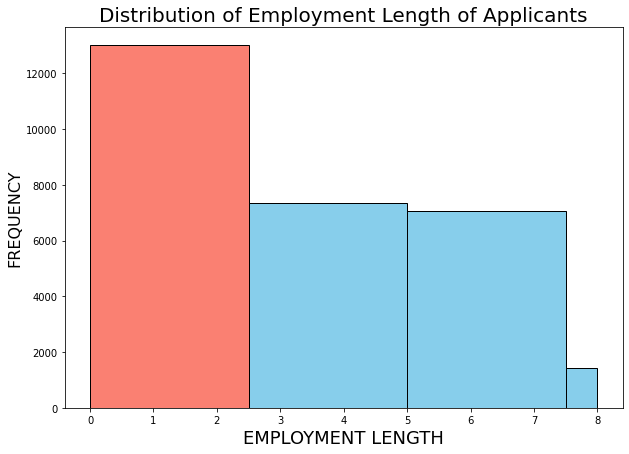

In [102]:
print(df.empworkyear.value_counts())

from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize =(10, 7))

#ax.hist(df.empworkyear, bins = [0,2.5, 5, 7.5,8],color=['skyblue','green','red','violet'])

ax = sns.histplot(data=df.empworkyear, bins = [0,2.5, 5, 7.5,8], color='skyblue', alpha=1)
ax.patches[0].set_facecolor('salmon')
plt.title('Distribution of Employment Length of Applicants',fontsize=20)
plt. xlabel('EMPLOYMENT LENGTH', fontsize=18)
plt. ylabel('FREQUENCY', fontsize=16)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

plt.show()


Conclusion: Applicants prefer loans at early stage of their employment.(can be assumed as people after 10 years of employment might not need loans because of their savings)

#Bivariate Analysis

In [69]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1

loan_status     Charged Off  Fully Paid  Total
home_ownership                                
MORTGAGE               2327       14693  17020
NONE                      0           3      3
OTHER                    18          80     98
OWN                     443        2532   2975
RENT                   2839       15641  18480
Total                  5627       32949  38576

loan_status     Charged Off  Fully Paid  Total  Charged Off Rate
home_ownership                                                  
OTHER                    18          80     98           18.3673
RENT                   2839       15641  18480           15.3626
OWN                     443        2532   2975           14.8908
MORTGAGE               2327       14693  17020           13.6722
NONE                      0           3      3            0.0000


loan_status  Charged Off    Fully Paid         Total  Charged Off Rate
count           5.000000      5.000000      5.000000          5.000000
mean         1125.400000   6589.800000   7715.200000         12.458580
std          1354.510723   7902.772343   9252.425125          7.175498
min             0.000000      3.000000      3.000000          0.000000
25%            18.000000     80.000000     98.000000         13.672200
50%           443.000000   2532.000000   2975.000000         14.890800
75%          2327.000000  14693.000000  17020.

Text(0.5, 1.0, 'Barplot of Home ownership VS Chargeoff Rate')

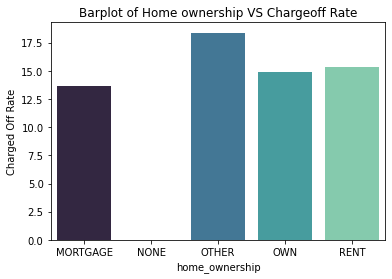

In [70]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
sns.barplot(x = xdata, y = ydata, palette = 'mako')
plt.title('Barplot of Home ownership VS Chargeoff Rate')

Conclusion: Of all home ownership categories, 'others' category has highest charged off rate with 18.3%.

loan_status         Charged Off  Fully Paid  Total  Charged Off Rate
purpose                                                             
small_business              475        1279   1754           27.0810
renewable_energy             19          83    102           18.6275
educational                  56         269    325           17.2308
other                       633        3232   3865           16.3777
house                        59         308    367           16.0763
moving                       92         484    576           15.9722
medical                     106         575    681           15.5653
debt_consolidation         2767       15288  18055           15.3254
vacation                     53         322    375           14.1333
home_improvement            347        2527   2874           12.0738
credit_card                 542        4485   5027           10.7818
car                         160        1339   1499           10.6738
wedding                      96   

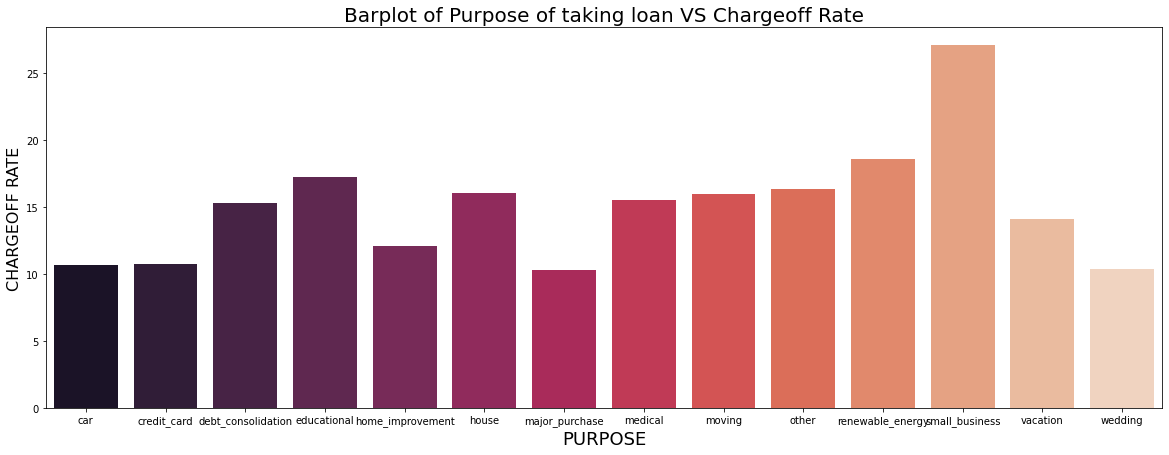

In [105]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(20, 7))
sns.barplot(x = xdata, y = ydata, palette = 'rocket')
plt.title('Barplot of Purpose of taking loan VS Chargeoff Rate',fontsize=20)
plt. xlabel('PURPOSE', fontsize=18)
plt. ylabel('CHARGEOFF RATE', fontsize=16)
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')

plt.show()


Conclusion: Applicants who take loan on 'SMALL BUSINESS' Purpose are likely to charge off with 27.08%
(can be assumed as, Small Business can't run well in initial stages and thus applicants can't repay loan immediately)
followed by renewable energy and educational.

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
addr_state                                                   
NE                     3           2      5           60.0000
NV                   108         371    479           22.5470
SD                    12          50     62           19.3548
AK                    15          63     78           19.2308
FL                   504        2277   2781           18.1230
MO                   114         556    670           17.0149
HI                    28         138    166           16.8675
ID                     1           5      6           16.6667
NM                    30         153    183           16.3934
OR                    71         364    435           16.3218
CA                  1125        5823   6948           16.1917
UT                    40         212    252           15.8730
MD                   162         861   1023           15.8358
GA                   215        1144   1359           15.8205
NJ      

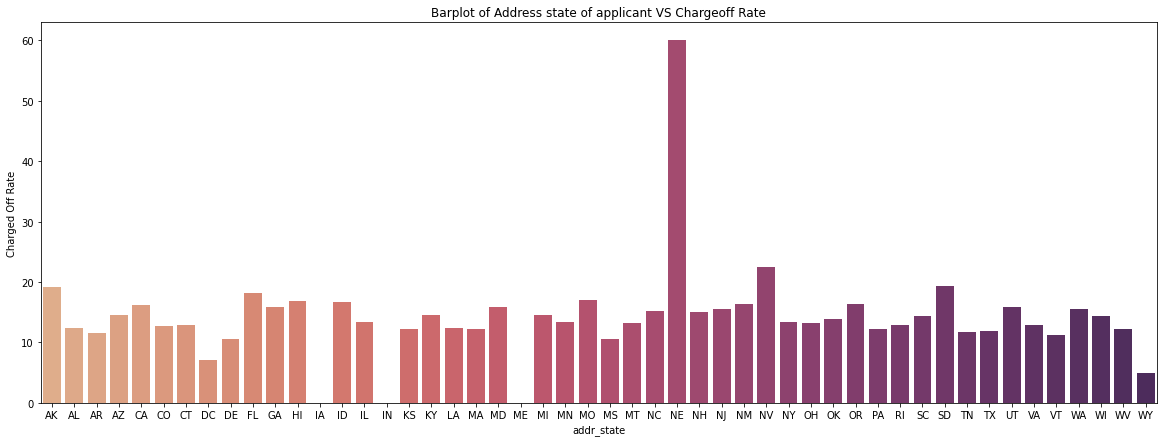

In [72]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(20, 7))
sns.barplot(x = xdata, y = ydata, palette = 'flare')
plt.title('Barplot of Address state of applicant VS Chargeoff Rate')
plt.show()

Conclusion: NE has highest charge off rate with 60%. 

i.e. out of 5, 3 are charged off.

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
term                                                         
60                  2400        7081   9481           25.3138
36                  3227       25868  29095           11.0913


loan_status  Charged Off    Fully Paid         Total  Charged Off Rate
count           2.000000      2.000000      2.000000          2.000000
mean         2813.500000  16474.500000  19288.000000         18.202550
std           584.777308  13284.415098  13869.192406         10.056826
min          2400.000000   7081.000000   9481.000000         11.091300
25%          2606.750000  11777.750000  14384.500000         14.646925
50%          2813.500000  16474.500000  19288.000000         18.202550
75%          3020.250000  21171.250000  24191.500000         21.758175
max          3227.000000  25868.000000  29095.000000         25.313800




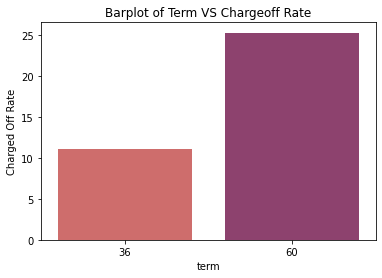

In [73]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
#plt.figure(figsize=(20, 7))
sns.barplot(x = xdata, y = ydata, palette = 'flare')
plt.title('Barplot of Term VS Chargeoff Rate')
plt.show()

Conclusion: Charged off Rate is high for applicants who take 60 months term(can be assumed that, people who take high amount of loans, fails to repay back though they get 60 months term)

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
grade                                                        
G                    101         198    299           33.7793
F                    319         657    976           32.6844
E                    715        1948   2663           26.8494
D                   1118        3967   5085           21.9862
C                   1347        6486   7833           17.1965
B                   1425       10250  11675           12.2056
A                    602        9443  10045            5.9930


loan_status  Charged Off    Fully Paid         Total  Charged Off Rate
count           7.000000      7.000000      7.000000          7.000000
mean          803.857143   4707.000000   5510.857143         21.527771
std           509.451479   4107.161388   4471.530030         10.409067
min           101.000000    198.000000    299.000000          5.993000
25%           460.500000   1302.500000   1819.500000         14.701050
50%           

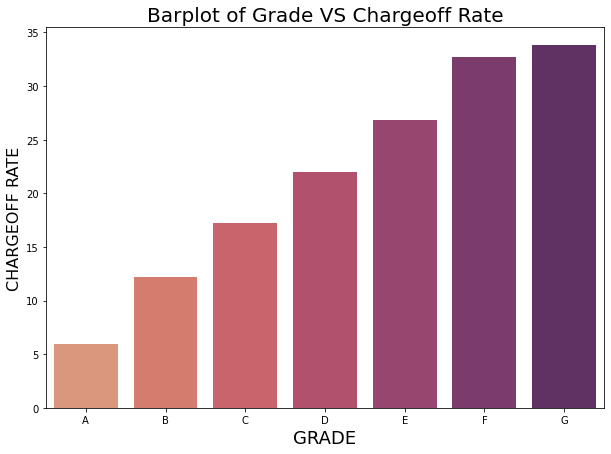

In [103]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(10, 7))
sns.barplot(x = xdata, y = ydata, palette = 'flare')
plt.title('Barplot of Grade VS Chargeoff Rate',fontsize=20)
plt. xlabel('GRADE', fontsize=18)
plt. ylabel('CHARGEOFF RATE', fontsize=16)
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

plt.show()


Conclusion: Grade G applicants have charge off rate

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
sub_grade                                                    
F5                    54          59    113           47.7876
G3                    19          26     45           42.2222
G2                    28          49     77           36.3636
F4                    53          98    151           35.0993
G5                    10          19     29           34.4828
G1                    31          63     94           32.9787
F2                    70         163    233           30.0429
F1                    91         214    305           29.8361
E4                   126         298    424           29.7170
F3                    51         123    174           29.3103
E5                   109         278    387           28.1654
E1                   198         524    722           27.4238
E2                   163         451    614           26.5472
D5                   209         625    834           25.0600
G4      

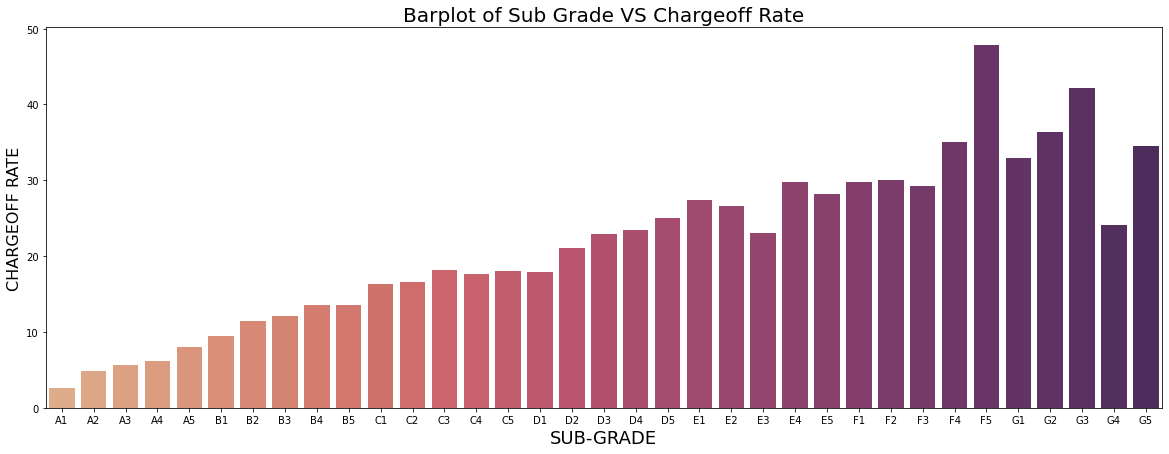

In [104]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(20, 7))
sns.barplot(x = xdata, y = ydata, palette = 'flare')
plt.title('Barplot of Sub Grade VS Chargeoff Rate',fontsize=20)
plt. xlabel('SUB-GRADE', fontsize=18)
plt. ylabel('CHARGEOFF RATE', fontsize=16)
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

plt.show()


Conclusion: Applicants with 'F5' sub grade have high charge off rate

In [76]:
df.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599       5000         5000           4975.0    36     10.65   
1    1314167       2500         2500           2500.0    60     15.27   
2    1313524       2400         2400           2400.0    36     15.96   
3    1277178      10000        10000          10000.0    36     13.49   
5    1311441       5000         5000           5000.0    36      7.90   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN  10+ years   
1        59.83     C        C4                 Ryder   < 1 year   
2        84.33     C        C5                   NaN  10+ years   
3       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
5           RENT     36000.0     Source Verified  11-Dec   Fully Paid   

          purpose                                  title addr_state    dti  \
0     credit_card                               Computer         AZ  27.65   
1             car                                   bike         GA   1.00   
2  small_business                   real estate business         IL   8.72   
3           other                               personel         CA  20.00   
5         wedding  My wedding loan I promise to pay back         AZ  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
5            0               3         9        0       7963     28.30%   

   total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0          9                   f   5863.155187          5833.84   
1          4                   f   1008.710000          1008.71   
2         10                   f   3005.666844          3005.67   
3         37                   f  12231.890000         12231.89   
5         12                   f   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       15-Jan           171.62             16-May   
1                     1.11       13-Apr           119.66             13-Sep   
2                     0.00       14-Jun           649.91             16-May   
3                     0.00       15-Jan           357.48             16-Apr   
5                     0.00       15-Jan           161.03             16-Jan   

   pub_rec_bankruptcies  homeownership_Numericstatus  empworkyear  \
0                   0.0                            1           10   
1                   0.0                            1            1   
2                   0.0                            1           10   
3                   0.0                            1           10   
5                   0.0                            1            3   

   gradenumericvalue  loanstatusnumvalue  
0                  2                   1  
1       

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
empworkyear                                                  
0                    228         805   1033           22.0716
10                  1331        7156   8487           15.6828
7                    263        1448   1711           15.3711
5                    458        2736   3194           14.3394
1                   1095        6582   7677           14.2634
6                    307        1861   2168           14.1605
8                    203        1232   1435           14.1463
3                    555        3457   4012           13.8335
4                    462        2880   3342           13.8241
2                    567        3724   4291           13.2137
9                    158        1068   1226           12.8874


loan_status  Charged Off   Fully Paid        Total  Charged Off Rate
count          11.000000    11.000000    11.000000         11.000000
mean          511.545455  2995.363636  3506.909091    

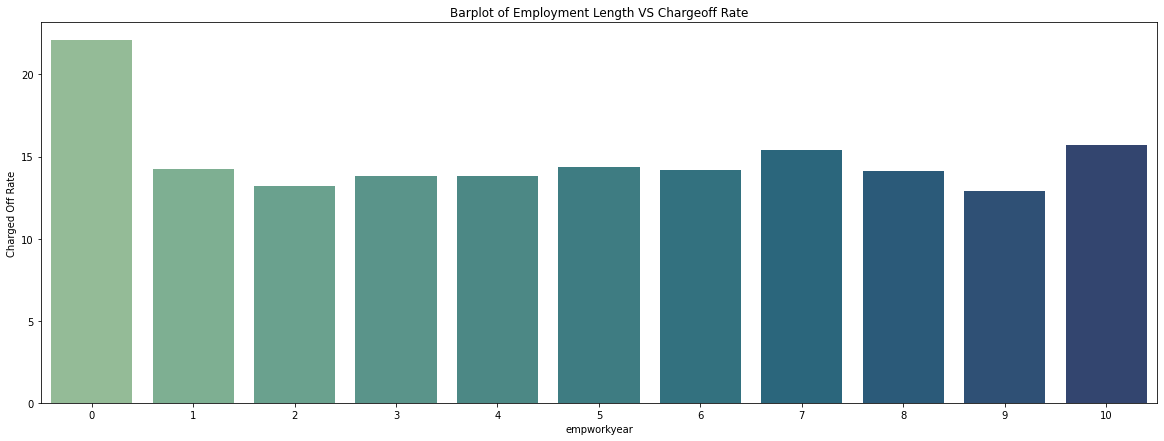

In [77]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'empworkyear',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(20, 7))
sns.barplot(x = xdata, y = ydata, palette = 'crest')
plt.title('Barplot of Employment Length VS Chargeoff Rate')
plt.show()

Conclusion: Applicants with 0 work experience are likely to get charged off (can be assumed that, people at their initial stages of employment, fails to repay the loan)

In [78]:
bin = [0,5, 10, 15, 20, 25]

range = ['0-5','5-10', '10-15', '15-20', '20-25']

df['int_rate_range'] = pd.cut(df.int_rate, bin, labels = range)

loan_status     Charged Off  Fully Paid  Total  Charged Off Rate
int_rate_range                                                  
20-25                   296         474    770           38.4416
15-20                  1794        5432   7226           24.8270
10-15                  2707       15557  18264           14.8215
5-10                    830       11486  12316            6.7392


loan_status  Charged Off    Fully Paid         Total  Charged Off Rate
count           4.000000      4.000000      4.000000          4.000000
mean         1406.750000   8237.250000   9644.000000         21.207325
std          1065.679556   6640.045049   7439.502313         13.665378
min           296.000000    474.000000    770.000000          6.739200
25%           696.500000   4192.500000   5612.000000         12.800925
50%          1312.000000   8459.000000   9771.000000         19.824250
75%          2022.250000  12503.750000  13803.000000         28.230650
max          2707.000000  15557.000000  

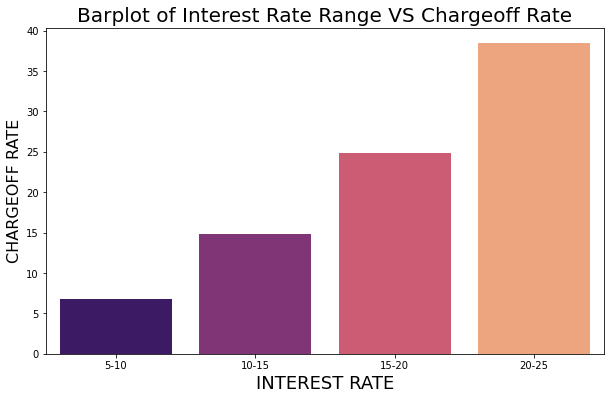

In [108]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'int_rate_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(10, 6))
sns.barplot(x = xdata, y = ydata, palette = 'magma')
plt.title('Barplot of Interest Rate Range VS Chargeoff Rate',fontsize=20)
plt. xlabel('INTEREST RATE', fontsize=18)
plt. ylabel('CHARGEOFF RATE', fontsize=16)
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')

plt.show()


In [80]:
bin = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]

range = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']
df['annual_inc_range'] = pd.cut(df.annual_inc, bin, labels = range)


loan_status       Charged Off  Fully Paid  Total  Charged Off Rate
annual_inc_range                                                  
0-20000                   237         943   1180           20.0847
20000-40000              1514        7004   8518           17.7741
40000-60000              1729        9534  11263           15.3511
60000-80000              1024        6597   7621           13.4366
220000-240000              13          89    102           12.7451
140000-160000              84         626    710           11.8310
80000-100000              531        3983   4514           11.7634
180000-200000              31         240    271           11.4391
120000-140000             137        1081   1218           11.2479
100000-120000             244        2084   2328           10.4811
200000-220000              11         104    115            9.5652
160000-180000              36         348    384            9.3750


loan_status  Charged Off   Fully Paid         Total  Charged

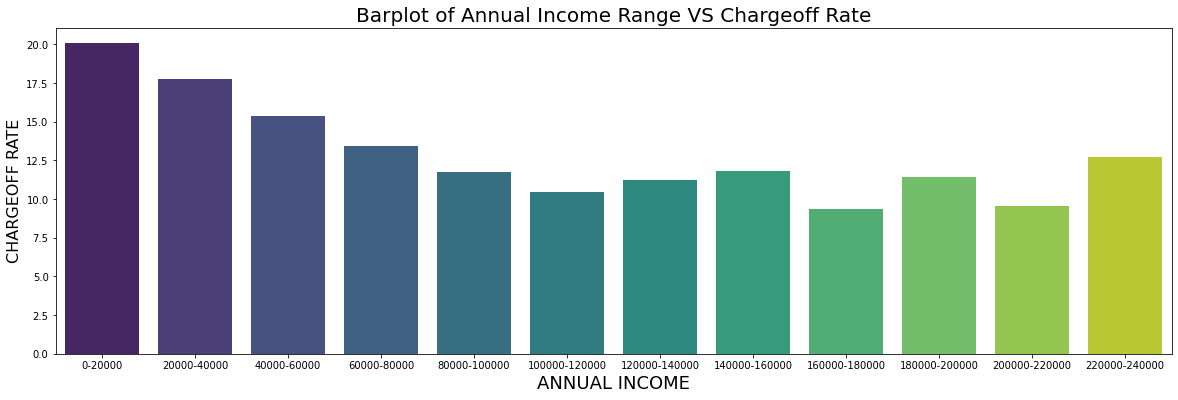

In [106]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'annual_inc_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(20, 6))
sns.barplot(x = xdata, y = ydata, palette = 'viridis')
plt.title('Barplot of Annual Income Range VS Chargeoff Rate',fontsize=20)
plt. xlabel('ANNUAL INCOME', fontsize=18)
plt. ylabel('CHARGEOFF RATE', fontsize=16)
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')

plt.show()


Conclusion: Applicants with low annual income are likely to get charged off

In [82]:
bin = [0,5, 10, 15, 20, 25]

range = ['0-5','5-10', '10-15', '15-20', '20-25']

df['dti_range'] = pd.cut(df.dti, bin, labels = range)

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
dti_range                                                    
20-25               1118        5460   6578           16.9960
15-20               1389        7422   8811           15.7644
10-15               1402        8228   9630           14.5587
5-10                1005        6868   7873           12.7651
0-5                  597        4286   4883           12.2261


loan_status  Charged Off   Fully Paid        Total  Charged Off Rate
count           5.000000     5.000000     5.000000          5.000000
mean         1102.200000  6452.800000  7555.000000         14.462060
std           330.552114  1576.685511  1876.059567          2.000342
min           597.000000  4286.000000  4883.000000         12.226100
25%          1005.000000  5460.000000  6578.000000         12.765100
50%          1118.000000  6868.000000  7873.000000         14.558700
75%          1389.000000  7422.000000  8811.000000         15.764400
max         

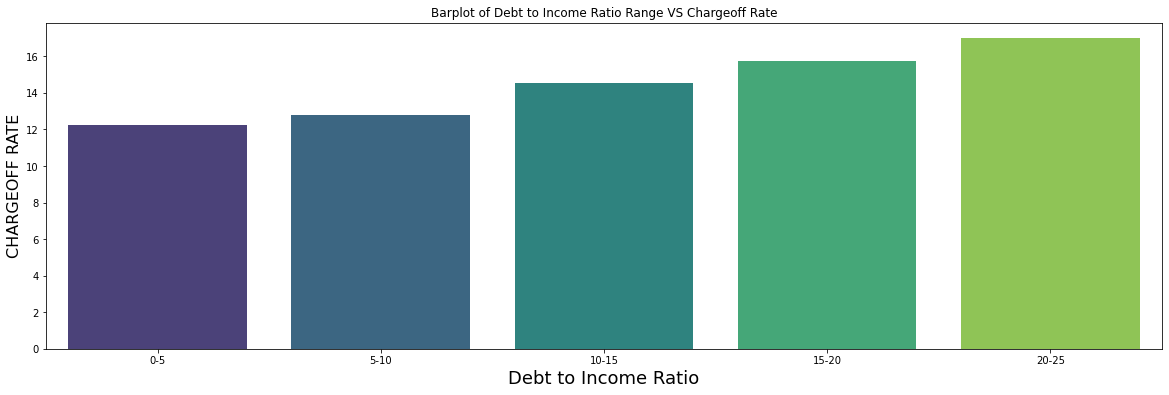

In [107]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'dti_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df1.iloc[0:-1].describe())
print('\n')

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(20, 6))
sns.barplot(x = xdata, y = ydata, palette = 'viridis')
plt.title('Barplot of Debt to Income Ratio Range VS Chargeoff Rate')
plt. xlabel('Debt to Income Ratio', fontsize=18)
plt. ylabel('CHARGEOFF RATE', fontsize=16)
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

plt.show()



Conclusion: As DTI increases, charge off rate increases

In [84]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'homeownership_Numericstatus', 'empworkyear',
       'gradenumericvalue', 'loanstatusnumvalue', 'int_rate_range',
       'annual_inc_range', 'dti_range'],
      dtype='object')

In [85]:
df1=df.iloc[:,0:-8]

In [86]:
df1.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599       5000         5000           4975.0    36     10.65   
1    1314167       2500         2500           2500.0    60     15.27   
2    1313524       2400         2400           2400.0    36     15.96   
3    1277178      10000        10000          10000.0    36     13.49   
5    1311441       5000         5000           5000.0    36      7.90   

   installment grade sub_grade             emp_title emp_length  \
0       162.87     B        B2                   NaN  10+ years   
1        59.83     C        C4                 Ryder   < 1 year   
2        84.33     C        C5                   NaN  10+ years   
3       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
5           RENT     36000.0     Source Verified  11-Dec   Fully Paid   

          purpose                                  title addr_state    dti  \
0     credit_card                               Computer         AZ  27.65   
1             car                                   bike         GA   1.00   
2  small_business                   real estate business         IL   8.72   
3           other                               personel         CA  20.00   
5         wedding  My wedding loan I promise to pay back         AZ  11.20   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0            0               1         3        0      13648     83.70%   
1            0               5         3        0       1687      9.40%   
2            0               2         2        0       2956     98.50%   
3            0               1        10        0       5598        21%   
5            0               3         9        0       7963     28.30%   

   total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0          9                   f   5863.155187          5833.84   
1          4                   f   1008.710000          1008.71   
2         10                   f   3005.666844          3005.67   
3         37                   f  12231.890000         12231.89   
5         12                   f   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  
0                     0.00       15-Jan           171.62             16-May  
1                     1.11       13-Apr           119.66             13-Sep  
2                     0.00       14-Jun           649.91             16-May  
3                     0.00       15-Jan           357.48             16-Apr  
5                     0.00       15-Jan           161.03             16-Jan

In [87]:

charged_off_df = df1[df.loan_status == 'Charged Off'].corr()
charged_off_df

member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
member_id                 1.000000   0.148485     0.161690         0.319364   
loan_amnt                 0.148485   1.000000     0.979134         0.907129   
funded_amnt               0.161690   0.979134     1.000000         0.926996   
funded_amnt_inv           0.319364   0.907129     0.926996         1.000000   
term                      0.310796   0.389484     0.372881         0.422297   
int_rate                  0.197176   0.351216     0.353906         0.369863   
installment               0.071906   0.925911     0.953826         0.858041   
annual_inc               -0.013352   0.352359     0.347131         0.314505   
dti                       0.111183   0.063872     0.060861         0.072924   
delinq_2yrs               0.002918  -0.029843    -0.027366        -0.031524   
inq_last_6mths           -0.065406   0.007480     0.007942        -0.018395   
open_acc                  0.012821   0.184323     0.181439         0.154601   
pub_rec                  -0.039820  -0.047690    -0.052527        -0.052717   
revol_bal                -0.024654   0.313101     0.296956         0.254045   
total_acc                 0.031458   0.283738     0.275088         0.252796   
total_pymnt               0.127992   0.680814     0.698496         0.685354   
total_pymnt_inv           0.227669   0.643174     0.660695         0.726049   
total_rec_prncp           0.052423   0.551302     0.569719         0.550112   
total_rec_int             0.208931   0.699167     0.712395         0.718712   
total_rec_late_fee       -0.096233   0.087517     0.094089         0.067972   
recoveries                0.062211   0.310185     0.316077         0.301537   
collection_recovery_fee  -0.054522   0.157602     0.164236         0.138645   
last_pymnt_amnt           0.021893   0.332981     0.338804         0.291813   

                             term  int_rate  installment  annual_inc  \
member_id                0.310796  0.197176     0.071906   -0.013352   
loan_amnt                0.389484  0.351216     0.925911    0.352359   
funded_amnt              0.372881  0.353906     0.953826    0.347131   
funded_amnt_inv          0.422297  0.369863     0.858041    0.314505   
term                     1.000000  0.455916     0.134187    0.079099   
int_rate                 0.455916  1.000000     0.327909    0.132252   
installment              0.134187  0.327909     1.000000    0.358656   
annual_inc               0.079099  0.132252     0.358656    1.000000   
dti                      0.063872  0.040607     0.042358   -0.089725   
delinq_2yrs             -0.013068  0.119643    -0.012530    0.021765   
inq_last_6mths          -0.005751  0.058475     0.018359    0.037303   
open_acc                 0.060871  0.038607     0.179676    0.212320   
pub_rec                 -0.004349  0.079085    -0.041068   -0.006679   
revol_bal                0.071120  0.075878     0.299930    0.379449   
total_acc                0.119505 -0.008655     0.251874    0.287343   
total_pymnt              0.266262  0.264457     0.666864    0.279975   
total_pymnt_inv          0.295771  0.277016     0.616589    0.262635   
total_rec_prncp          0.092587  0.070138     0.577424    0.239091   
total_rec_int            0.458564  0.468654     0.628887    0.263186   
total_rec_late_fee      -0.030813  0.055287     0.119871    0.062817   
recoveries               0.130610  0.159769     0.300368    0.134942   
collection_recovery_fee  0.004217  0.072141     0.185040    0.087584   
last_pymnt_amnt          0.047997  0.093077     0.350428    0.130603   

                              dti  delinq_2yrs  inq_last_6mths  open_acc  \
member_id                0.111183     0.002918       -0.065406  0.012821   
loan_amnt                0.063872    -0.029843        0.007480  0.184323   
funded_amnt              0.060861    -0.027366        0.007942  0.181439   
funded_amnt_inv          0.072924    -0.031524       -0.018395  0.154601   
term               

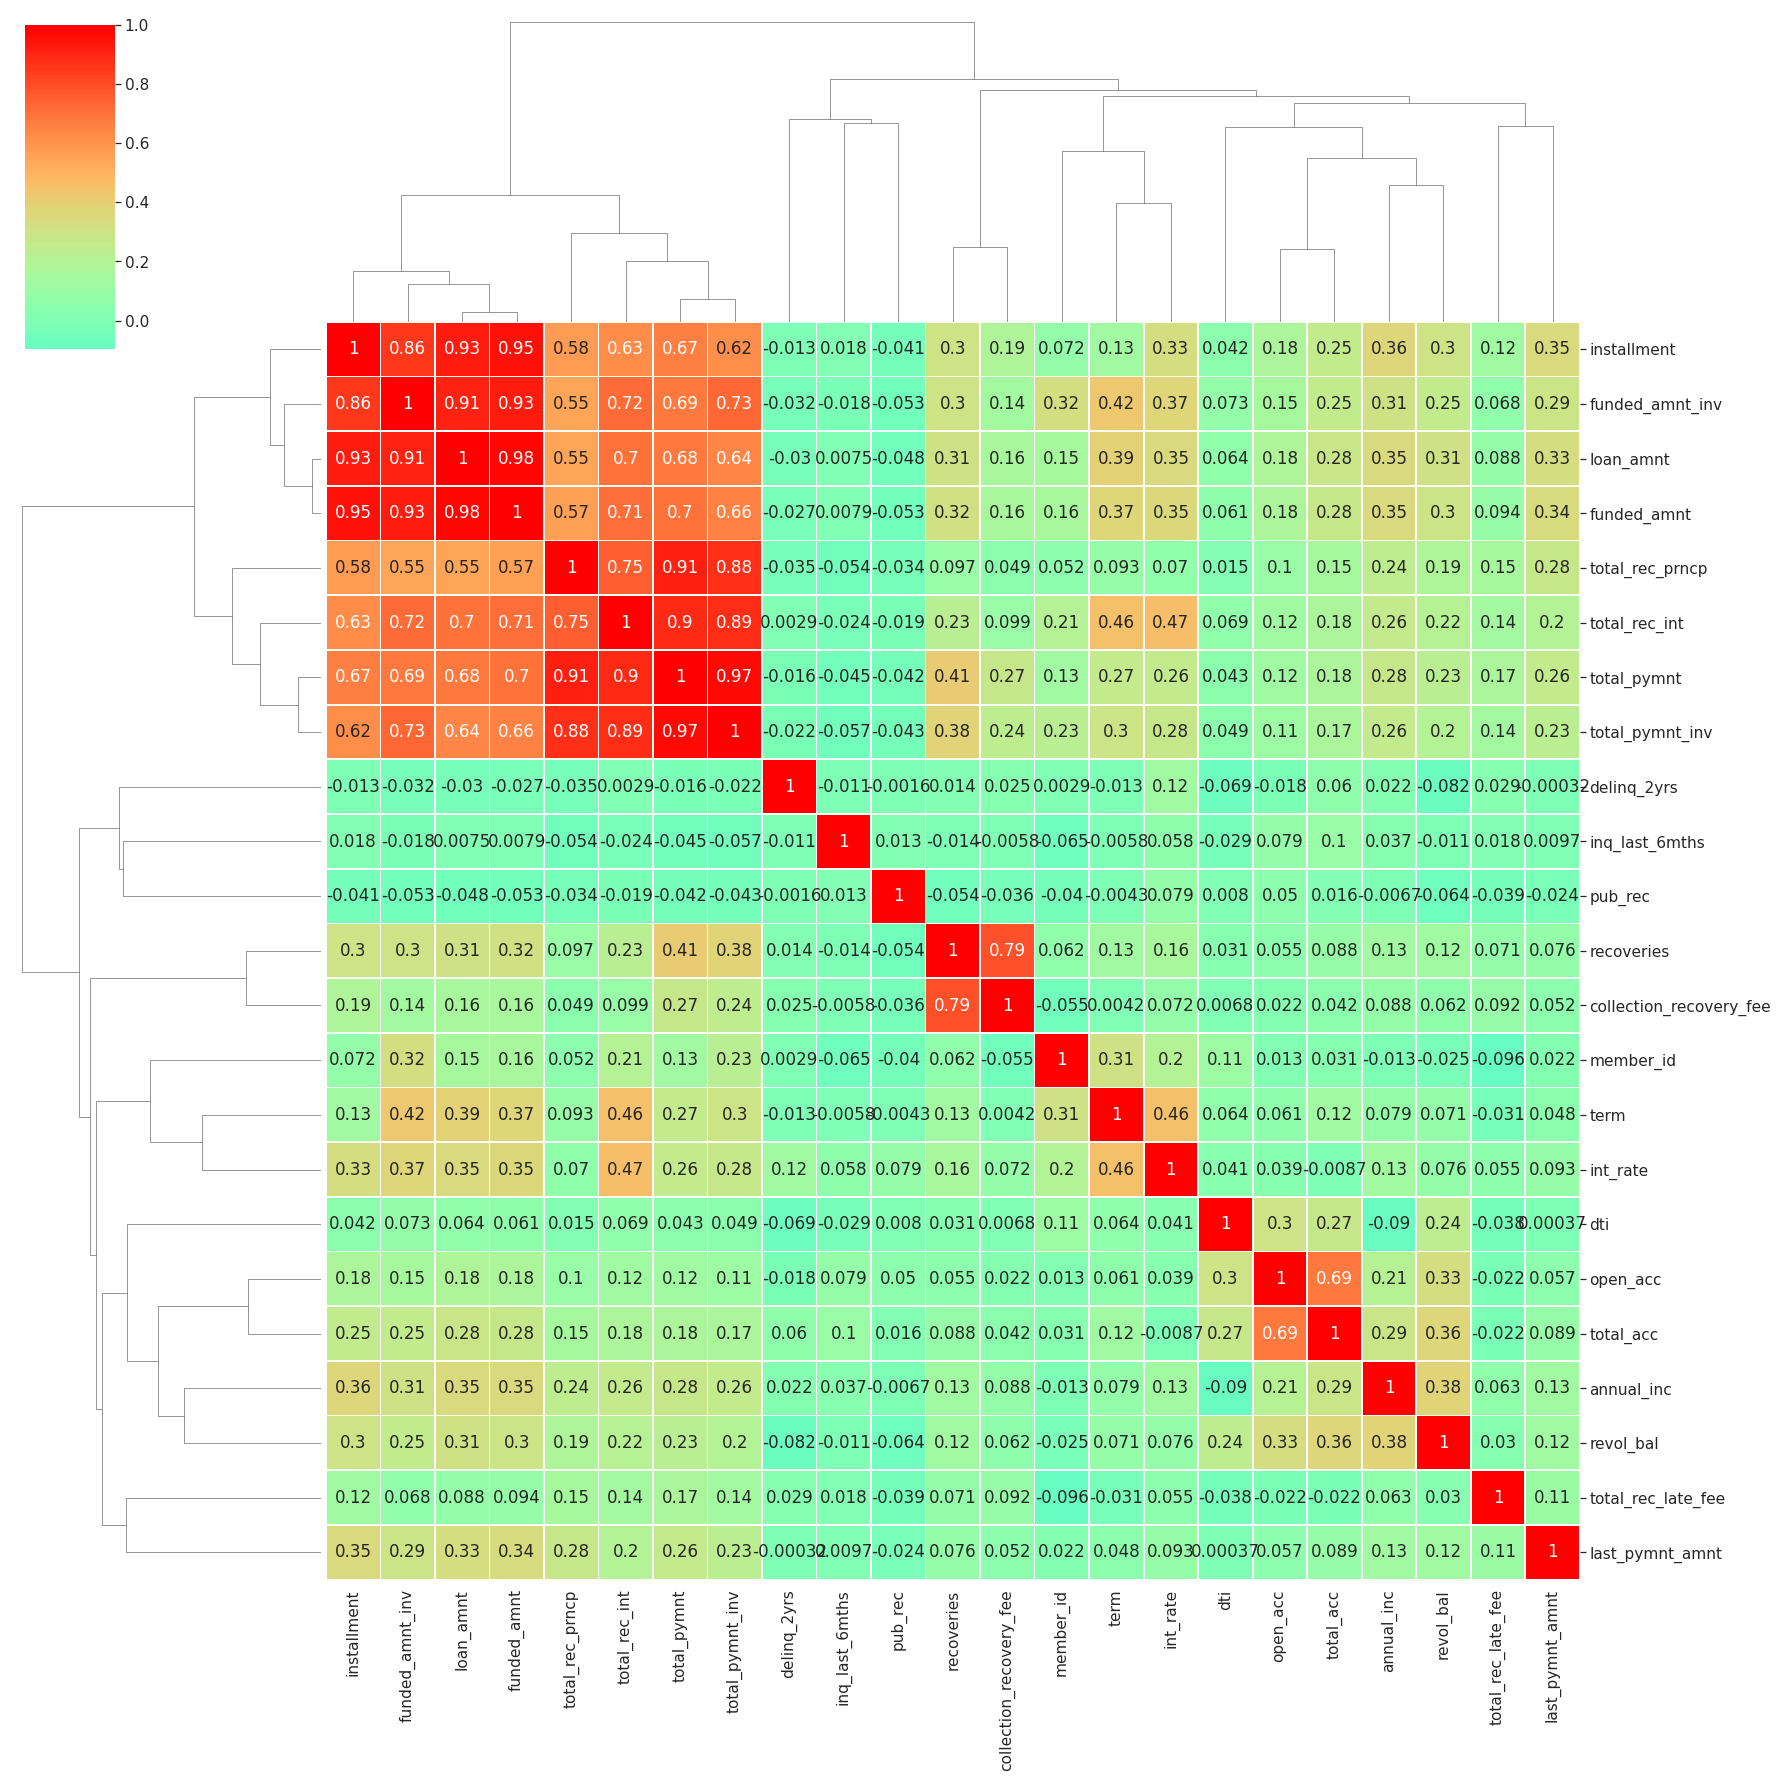

In [120]:
kwargs = {'annot': True}

sns.clustermap(charged_off_df, center = 0, cmap = 'rainbow', linewidths = 0.75, figsize = (25, 25), **kwargs)

plt.savefig('plotheatmap.png', dpi=300, bbox_inches='tight')

plt.show()


Conclusion: installment, funded_amnt_inv, funded_amnt and loan_amnt are highly correlated. They form a cluster.